## Test Comets Modelos

In [1]:
import cobra
import os
from cobra.io import read_sbml_model
from cobra.medium import minimal_medium
import cometspy as c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Concentración de azúcares en el medio

Como ya hemos comentado en anteriores ocasiones, los azúcares que utilizaremos para la modelización son: glucosa, galactosa, xilosa y ramnosa. Sin embargo, para este análisis consideraremos una mezcla homogénea de los azúcares de algas verdes, rojas y marrones. Consideramos que el ácido glucurónico no puede ser metabolizado por estos modelos, dado que no tienen reacciones de exchange acordes. También podríamos hacer análisis para otros tipos de algas.

In [83]:
model = descargar_leer_agora2(lista_candidatos[1])
model.name

'Bacillus paralicheniformis ATCC 9945a'

In [20]:
model.summary
model.metabolites.get_by_id("5dgclur[c]").summary()

Percent,Flux,Reaction,Definition
Percent,Flux,Reaction,Definition


In [25]:
list(model.metabolites.get_by_id("5dgclur[c]").reactions)[0]

Reaction identifier,5DGCLURI
Name,5-deoxy-glucuronate isomerase (EC 5.3.1.-)
Memory address,0x26191c98dc0
Stoichiometry,5dgclur[c] <=> d5kg[c] 5-Deoxy glucuronic acid <=> 2-deoxy-5-keto-D-gluconic acid
GPR,BALI_RS20915
Lower bound,-1000.0
Upper bound,1000.0


In [2]:
lista_candidatos= candidate_models("candidate_models.txt")

Vamos a buscar que otros azúcares característicos de las algas pueden ser consumidos por estas bacterias:

In [9]:
#Función para buscar qué azúcares pueden ser utilizados por los modelos
def look_for_metabolite(met_name):
    for model_name in lista_candidatos:
        model = descargar_leer_agora2(model_name)
        print(".", end="")
        for met in model.metabolites:
            if met_name in met.name.lower():
                print(model.name," ", met.id, ": ", met.name)

In [13]:
look_for_metabolite("glucuronic")

..Bacillus paralicheniformis ATCC 9945a   5dgclur[c] :  5-Deoxy glucuronic acid
.Bacillus amyloliquefaciens subsp amyloliquefaciens DC 12   5dgclur[c] :  5-Deoxy glucuronic acid
.Bacillus subtilis subsp subtilis str SMY   5dgclur[c] :  5-Deoxy glucuronic acid
.Bacillus atrophaeus str Dugway   5dgclur[c] :  5-Deoxy glucuronic acid
.....Bacillus mojavensis RO H 1   5dgclur[c] :  5-Deoxy glucuronic acid
.Bacillus licheniformis HRBL 15TDI7   5dgclur[c] :  5-Deoxy glucuronic acid
...Bacillus velezensis UCMB5036   5dgclur[c] :  5-Deoxy glucuronic acid
.Corynebacterium ammoniagenes DSM 20306   5dgclur[c] :  5-Deoxy glucuronic acid
..Lysinibacillus fusiformis ZB2   5dgclur[c] :  5-Deoxy glucuronic acid
.......Propionibacterium freudenreichii subsp shermanii CIRM BIA1   5dgclur[c] :  5-Deoxy glucuronic acid
..Brevibacterium casei S18   5dgclur[c] :  5-Deoxy glucuronic acid
..................

In [10]:
look_for_metabolite("mannuronic")

............................................

In [11]:
look_for_metabolite("guluronic")

............................................

In [12]:
look_for_metabolite("mannitol")

.Corynebacterium casei UCMA 3821   mnl1p[c] :  D-Mannitol 1-phosphate
Corynebacterium casei UCMA 3821   mnl[c] :  D-Mannitol
Corynebacterium casei UCMA 3821   mnl[e] :  D-Mannitol
.Bacillus paralicheniformis ATCC 9945a   mnl1p[c] :  D-Mannitol 1-phosphate
Bacillus paralicheniformis ATCC 9945a   mnl[e] :  D-Mannitol
.Bacillus amyloliquefaciens subsp amyloliquefaciens DC 12   mnl1p[c] :  D-Mannitol 1-phosphate
Bacillus amyloliquefaciens subsp amyloliquefaciens DC 12   mnl[e] :  D-Mannitol
.Bacillus subtilis subsp subtilis str SMY   mnl1p[c] :  D-Mannitol 1-phosphate
Bacillus subtilis subsp subtilis str SMY   mnl[e] :  D-Mannitol
.Bacillus atrophaeus str Dugway   mnl1p[c] :  D-Mannitol 1-phosphate
Bacillus atrophaeus str Dugway   mnl[e] :  D-Mannitol
.Streptococcus thermophilus ND03   mnl1p[c] :  D-Mannitol 1-phosphate
Streptococcus thermophilus ND03   mnl[e] :  D-Mannitol
.Microbacterium gubbeenense DSM 15944   mnl1p[c] :  D-Mannitol 1-phosphate
Microbacterium gubbeenense DSM 15944   mnl

In [26]:
look_for_metabolite("fucose")

...Bacillus amyloliquefaciens subsp amyloliquefaciens DC 12   fuc1p_L[c] :  L-Fucose 1-phosphate
Bacillus amyloliquefaciens subsp amyloliquefaciens DC 12   fuc_L[c] :  L-fucose
..Bacillus atrophaeus str Dugway   fuc1p_L[c] :  L-Fucose 1-phosphate
Bacillus atrophaeus str Dugway   fuc_L[c] :  L-fucose
.Streptococcus thermophilus ND03   fuc1p_L[c] :  L-Fucose 1-phosphate
Streptococcus thermophilus ND03   fuc_L[c] :  L-fucose
.Microbacterium gubbeenense DSM 15944   fuc1p_L[c] :  L-Fucose 1-phosphate
Microbacterium gubbeenense DSM 15944   fuc_L[c] :  L-fucose
...Bacillus mojavensis RO H 1   fuc1p_L[c] :  L-Fucose 1-phosphate
Bacillus mojavensis RO H 1   fuc_L[c] :  L-fucose
...Bifidobacterium adolescentis L2 32   fuc_L[c] :  L-fucose
Bifidobacterium adolescentis L2 32   fuc_L[e] :  L-fucose
..Corynebacterium ammoniagenes DSM 20306   fuc1p_L[c] :  L-Fucose 1-phosphate
Corynebacterium ammoniagenes DSM 20306   fuc_L[c] :  L-fucose
.Geobacillus stearothermophilus ATCC 7953   fuc1p_L[c] :  L-Fuc

In [4]:
#Función para definir la concentración de azúcares en el medio dada el porcentaje respectivo a la glucosa
#Devuelve un diccionario con estos valores
#Ajustamos la concentración total a 20 mM
def sugar_levels(glc_D=18.4, xyl_D=11.6, rmn=39.4, gal=0, mnl=0, conc = 20):
    #Definimos el ratio de todos respecto de la glucosa
    sugar_names = ["glc_D", "xyl_D", "rmn", "gal", "mnl"]
    concentraciones = {}
    for name in sugar_names:
        if eval(name) > 0:
            concentraciones[name+"[e]"] = eval(name)
    #Si no suman 20 ajustamos
    suma = sum(list(concentraciones.values()))
    ratio = conc/suma
    if suma != conc:
       for azucar, conc in concentraciones.items():
           concentraciones[azucar] = round(conc*ratio, 6)
    
    return concentraciones

sugar_levels()

{'glc_D[e]': 5.302594, 'xyl_D[e]': 3.342939, 'rmn[e]': 11.354467}

## Funciones para el análisis

Funciones para definir los medios:

In [8]:
#Devuelve una lista con los nombres de los modelos que crecen en un medio mínimo con los azúcares especificados
#Procede del resultado de un análisis anterior
def candidate_models(file_path):
    with open(file_path, 'r') as archivo:
        lineas = archivo.readlines()
    candidates = []
    for line in lineas:
        model_name = line.replace("\n","")
        candidates.append(model_name)
    return candidates

#La siguiente función descarga el modelo .sbml y lo guarda en una carpeta "modelos_agora", tras lo cual lo carga
#Si el modelo ya está descargado en dicha carpeta, simplemente lo carga
def descargar_leer_agora2(nombre_modelo):
    nombre_modelo = nombre_modelo
    url_padre = "https://www.vmh.life/files/reconstructions/AGORA2/version2.01/sbml_files/individual_reconstructions/"
    url = url_padre + nombre_modelo
    #Directorio donde se guardan los modelos
    nombre_directorio = "modelos_agora"
    directorio_actual = os.getcwd()
    ruta_directorio = os.path.join(directorio_actual, nombre_directorio)
    #Lo creamos si no existe
    if not os.path.exists(ruta_directorio):
        os.makedirs(ruta_directorio)
        models_dir = ruta_directorio
    else:
        models_dir = ruta_directorio
    #Si ya existe el archivo no hace falta descargarlo, se importa directamente
    ruta_archivo = os.path.join(str(models_dir), nombre_modelo)
    if os.path.exists(ruta_archivo):
        model = read_sbml_model(str(ruta_archivo))
        return model 
    #Si no existe se descarga y se importa
    else:
        try:
            # Realizar la solicitud GET a la URL del archivo
            respuesta = requests.get(url)

            # Verificar si la solicitud fue exitosa (código de estado 200)
            if respuesta.status_code == 200:
                # Guardar el archivo localmente
                with open(ruta_archivo, 'wb') as archivo_local:
                    archivo_local.write(respuesta.content)
                #print(f"Archivo descargado exitosamente como '{nombre_modelo}'.")
                #Determinamos el path al archivo
                model = read_sbml_model(str(ruta_archivo))
                return model

            else:
                print(f"Error al descargar el archivo. Código de estado: {respuesta.status_code}")

        except Exception as e:
            print("Error del modelo " + str(nombre_modelo))


In [9]:
#Función para traducir de "exchange" a metabolito:
def traduc_exchange(exchange):
    met = exchange.replace("EX_", "").replace("(", "[").replace(")","]")
    return met

# Funcion Para obtener un diccionario con:
# - Reaccion de exchange del medio realmente mínimo (fuentes de carbono y auxotrofías): bound
def media_cobra_dicc(model):
    #Determinamos exchange generales
    general_ex = {}
    with open('exchanges.txt', 'r') as archivo:
        lineas = archivo.readlines()

    for line in lineas:
        id, boundary = line.replace("\n", "").split(" ")
        boundary = float(boundary)
        general_ex[id] = boundary
    #Nos quedamos con las exchange del medio mínimo de cobra
    minimal_ex = list(minimal_medium(model).index)
    #Guardamos todas los ids de las reacciones del modelo
    model_rxns = [rxn.id for rxn in model.reactions]
    
    true_minimal = {}
    #Hacemos las pruebas
    with model as m:
        #Cerramos todas las exchange
        media = {}
        for id in model.medium.keys():
            media[id] = 0
        model.medium = media
        #Abrimos las del medio mínimo
        media = {}
        for reac in minimal_ex:
            media[reac] = 1000
        #Abrimos las de los metabolitos generales
        #También así se ajustan los bounds de estos exchanges
        for reac, bound in general_ex.items():
            if reac in model_rxns:
                media[reac] = bound
        #Creamos el medio
        model.medium = media

        #Las cerramos de una en una viendo si crece, si no crece lo añadimos a la lista de metabolitos minimos
        minimal_rxs = []
        for id in minimal_ex:
            with model as m:
                #Las cerramos de una en una viendo si crece
                model.reactions.get_by_id(id).bounds = (0,0)
                #print(model.medium)
                sol = model.optimize()
                if sol.objective_value < 0.1:
                    minimal_rxs.append(id)
    #Normalizamos los boundaries según número de carbono
    uptake = 5
    flujo = uptake * 6
    for rxn_id in minimal_rxs:
        try:
            n_carbonos = list(model.reactions.get_by_id(rxn_id).metabolites.keys())[0].elements["C"]
            bound = flujo/n_carbonos
            if bound > uptake:
                bound = uptake
            true_minimal[rxn_id] = bound/10 #Lo dejamos a muchas veces menos para que no se utilice como fuente de carbono principal
        except:
            true_minimal[rxn_id] = 1000
    #Añadimos los metabolitos generales
    for reac, bound in general_ex.items():
        if reac in model_rxns:
            true_minimal[reac] = bound
 
    return true_minimal

#Ahora concatenamos todos los medios de los modelos
def general_minimal_media(models):
    general_media = {}
    for modelo in models:
        minimal_media = media_cobra_dicc(modelo)
        for exchange, bound in minimal_media.items():
            #Añadimos el exchange al medio si no está
            if exchange not in list(general_media.keys()):
                general_media[exchange] = bound
    
    return general_media

Funciones para el análisis con COMETS:

In [10]:
#Función para determinar el ciclo en el que se acaba un recurso
def consumed_cycle(series):
    for i, step in enumerate(series):
        if i == len(series)-1 and step != 0:
            return 0
        elif step < 0.1:
            return i
        
consumed_cycle([0,0,0,0,0])

0

In [11]:
#Función para cerrar todos los exchange de un medio:
def close_all_ex(model):
    media_closed = {}
    for reac in model.medium.keys():
        media_closed[reac] = 0
    model.medium = media_closed

#Funcion para abrir exchanges si existen, dado un diccionario con: reaction_id, bound
def open_available_exchanges(model, dicc_exchanges):
    for reac, bound in dicc_exchanges.items():
        if reac in [rx.id for rx in model.reactions]:
            model.reactions.get_by_id(reac).lower_bound = -bound

#Realiza la simulación de COMETS, plotea la biomasa y los azúcares de interés en función del tiempo y guarda la figura como un jpg
#El medio está en forma de diccionario, con los exchanges y los bounds de cobra
def plot_growth(model, medio, glc_D=1, xyl_D=1, rmn=1, gal=1, mnl=0, conc=5):
    #Inicializamos el layout
    ly = c.layout()

    #Añadimos el medio
    medio_cobra = medio
    media_dict = {}
    for ex_id, bound in medio_cobra.items():
        met = traduc_exchange(ex_id)
        media_dict[met] = 1.5
    #Actualizamos el valor de los azúcares
    for met_id, value in sugar_levels(glc_D=glc_D, xyl_D=xyl_D, rmn=rmn, gal=gal, mnl=mnl).items():
        media_dict[met_id] = value
    
    for met, cant in media_dict.items():
        ly.set_specific_metabolite(met, cant)
    #Añadimos el peptidoglicano
    ly.set_specific_metabolite("PGPm1[c]", 100)
    #print(ly.media)
    
    #Añadimos el modelo
    new_model = None
    with model as m:
        #Cerramos las exchange
        close_all_ex(model)
        #Abrimos los exchange que existan con el bound adecuado
        open_available_exchanges(model, medio_cobra)
        new_model = model.copy()
    model_added = c.model(new_model)
    model_added.initial_pop=[0,0,0.0001]
    ly.add_model(model_added)

    #Seteamos los parámetros
    params=c.params()
    params.all_params['allowCellOverlap']= True
    params.all_params['maxSpaceBiomass']= 1000
    params.all_params['writeMediaLog']=True
    params.all_params['MediaLogRate'] = 1
    params.all_params['maxCycles']=300
    #params.all_params["batchDilution"] = True

    """
    params.all_params['maxCycles']=170
    params.all_params['timeStep']=0.1
    params.all_params['spaceWidth']=0.05
    params.all_params['allowCellOverlap']= True
    params.all_params['deathRate']= 0.0
    params.all_params['numRunThreads']= 8
    params.all_params['maxSpaceBiomass']= 1000
    params.all_params['defaultVmax']=20
    params.all_params['showCycleTime']=True
    params.all_params['writeTotalBiomassLog']=True
    params.all_params['writeMediaLog']=True
    params.all_params['writeFluxLog']=True
    params.all_params['useLogNameTimeStamp']=False
    params.all_params['FluxLogRate']=1
    params.all_params['MediaLogRate']=1
    params.all_params['exchangestyle']='Standard FBA'
    """
    c_assay = c.comets(ly, params)
    c_assay.run()

    #Hacemos el plot
    biomass = c_assay.total_biomass
    media = c_assay.media
    """"
    biomass['Tiempo (h)'] = biomass['cycle'] * c_assay.parameters.all_params['timeStep']
    biomass = biomass.drop(columns=['cycle'])

    myplot = biomass.plot(x = 'Tiempo (h)')
    myplot.set_ylabel("Biomasa (g)")
    """
    #Creamos el dataframe de salida que contiene las siguientes columnas:
    # Tiempo (t)
    # Biomasa (Nombre del organismo)
    # Concentracion de cada una de las fuentes de carbono de interés (gal[e], glc_D[e], xyl_D[e],rmn[e])
    columnas = ["t"]
    df = pd.DataFrame(columns=columnas)
    name = " ".join(biomass.columns[1].replace("_", " ").replace("M ","").split( )[0:2])
    time = biomass["cycle"].values*0.1
    mass = biomass[biomass.columns[1]].values
    glucose, galactose, xylose, rhamnose, manitol = "glc_D[e]", "gal[e]", "xyl_D[e]", "rmn[e]", "mnl[e]"
    gluc = list(media.loc[media["metabolite"]==glucose]["conc_mmol"].values)
    galac = list(media.loc[media["metabolite"]==galactose]["conc_mmol"].values)
    xyl = list(media.loc[media["metabolite"]==xylose]["conc_mmol"].values)
    rham = list(media.loc[media["metabolite"]==rhamnose]["conc_mmol"].values)
    mnl = list(media.loc[media["metabolite"]==manitol]["conc_mmol"].values)
    azucares = [gluc, galac, xyl, rham, mnl]

    #Añadimos los valores que falten
    for sugar in azucares:
        if len(sugar) < len(mass):
            for i in range(len(mass)-len(sugar)):
                sugar.append(0)

    #Rellenamos el dataframe final
    df["t"] = time
    df["Biomasa (g/L)"] = mass
    df["Glucosa (mM)"] = gluc
    df["Galactosa (mM)"] = galac
    df["Xilosa (mM)"] = xyl
    df["Ramnosa (mM)"] = rham
    df["Manitol (mM)"] = mnl

    #Sólo tenemos en cuenta los datos hasta que se acaba la concentración de azúcares
    final_cycle = max([consumed_cycle(sugar) for sugar in azucares]) + 1
    #print("El ciclo final es: ", final_cycle)

    #Filtramos el dataframe para solo tener en cuenta estas instancias
    #filtered_df = df[df.index < final_cycle]
    filtered_df = df

    #Número de instancias del dataframe
    len_df = len(filtered_df["t"])

    #Hacemos el plot
    #Directorio donde se guardan los modelos
    name_dir = "./Gráficas/"

    # Crear la figura y el primer eje
    fig, ax1 = plt.subplots()

    # Graficar en el primer eje
    color = "green"
    ax1.set_xlabel('Tiempo (h)')
    ax1.set_ylabel('Biomasa (g/L)')
    ax1.plot(filtered_df["t"], filtered_df["Biomasa (g/L)"], color=color, label='Biomasa (g/L)')
    ax1.tick_params(axis='y')

    # Crear el segundo eje que comparte el mismo eje x pero tiene una escala y diferente
    ax2 = ax1.twinx()

    sugars_consumed = []
    # Graficar las variables en el segundo eje
    ax2.set_ylabel('Concentración (mM)')
    for column in filtered_df.columns[2:]:
        if filtered_df[column][0] != filtered_df[column][len_df-1]:
            ax2.plot(filtered_df["t"], filtered_df[column], label=column)
            sugars_consumed.append(column.replace(" (mM)",""))
    ax2.tick_params(axis='y')

    # Añadir una leyenda
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    # Añadir un título
    plt.title(name, fontstyle='italic')

    # Guardar el gráfico como archivo JPG
    filename = name + ".jpg"
    plt.savefig(name_dir+filename, format='jpg', dpi = 500)

    # Mostrar el plot
    plt.show()

    #Guardamos la biomasa final
    biomasa_final = list(mass)[len_df-1]

    return filtered_df, name, biomasa_final, sugars_consumed, c_assay

## Prueba con un modelo

In [12]:
lista_candidatos = candidate_models("candidate_models.txt")
modelos_candidatos = [descargar_leer_agora2(modelo) for modelo in lista_candidatos]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-12


KeyboardInterrupt: 

In [207]:
model = modelos_candidatos[0]

In [ ]:
import warnings
warnings.filterwarnings("ignore")
medio_general = general_minimal_media(modelos_candidatos)
medio_general

{'EX_12dgr180(e)': 0.07692307692307693,
 'EX_4hbz(e)': 0.42857142857142855,
 'EX_ca2(e)': 1000.0,
 'EX_cgly(e)': 0.5,
 'EX_cl(e)': 1000.0,
 'EX_cobalt2(e)': 1000.0,
 'EX_cu2(e)': 1000.0,
 'EX_fe3(e)': 1000.0,
 'EX_k(e)': 1000.0,
 'EX_metala(e)': 0.375,
 'EX_mg2(e)': 1000.0,
 'EX_mn2(e)': 1000.0,
 'EX_o2(e)': 18.5,
 'EX_ribflv(e)': 0.1764705882352941,
 'EX_so4(e)': 30.0,
 'EX_thm(e)': 0.25,
 'EX_zn2(e)': 1000.0,
 'EX_h(e)': 1000.0,
 'EX_na1(e)': 1000.0,
 'EX_nh4(e)': 1000.0,
 'EX_pi(e)': 1000.0,
 'EX_glc_D(e)': 5.0,
 'EX_xyl_D(e)': 5.0,
 'EX_h2o(e)': 1000.0,
 'EX_fe2(e)': 1000.0,
 'EX_glyasn(e)': 0.5,
 'EX_lys_L(e)': 0.5,
 'EX_26dap_M(e)': 0.42857142857142855,
 'EX_alaleu(e)': 0.33333333333333337,
 'EX_glytyr(e)': 0.2727272727272727,
 'EX_spmd(e)': 0.42857142857142855,
 'EX_alahis(e)': 0.33333333333333337,
 'EX_glycys(e)': 0.5,
 'EX_nac(e)': 0.5,
 'EX_pnto_R(e)': 0.33333333333333337,
 'EX_pydx(e)': 0.375,
 'EX_glymet(e)': 0.42857142857142855,
 'EX_mqn7(e)': 0.06521739130434782,
 'EX_ocd

In [34]:
#Exportamos el medio general
import json

# Escribir el diccionario a un archivo JSON
with open('Medio_RQ.json', 'w') as f:
    json.dump(medio_general, f)

In [193]:
medio = media_cobra_dicc(model)
medio

{'EX_12dgr180(e)': 0.07692307692307693,
 'EX_4hbz(e)': 0.42857142857142855,
 'EX_ca2(e)': 1000.0,
 'EX_cgly(e)': 0.5,
 'EX_cl(e)': 1000.0,
 'EX_cobalt2(e)': 1000.0,
 'EX_cu2(e)': 1000.0,
 'EX_fe3(e)': 1000.0,
 'EX_k(e)': 1000.0,
 'EX_metala(e)': 0.375,
 'EX_mg2(e)': 1000.0,
 'EX_mn2(e)': 1000.0,
 'EX_o2(e)': 18.5,
 'EX_ribflv(e)': 0.1764705882352941,
 'EX_so4(e)': 30.0,
 'EX_thm(e)': 0.25,
 'EX_zn2(e)': 1000.0,
 'EX_h(e)': 1000.0,
 'EX_na1(e)': 1000.0,
 'EX_nh4(e)': 1000.0,
 'EX_pi(e)': 1000.0,
 'EX_glc_D(e)': 5.0,
 'EX_xyl_D(e)': 5.0,
 'EX_h2o(e)': 1000.0}

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpao68d9jx.lp
Reading time = 0.02 seconds
: 1348 rows, 3288 columns, 14260 nonzeros

Running COMETS simulation ...
Done!
El ciclo final es:  176


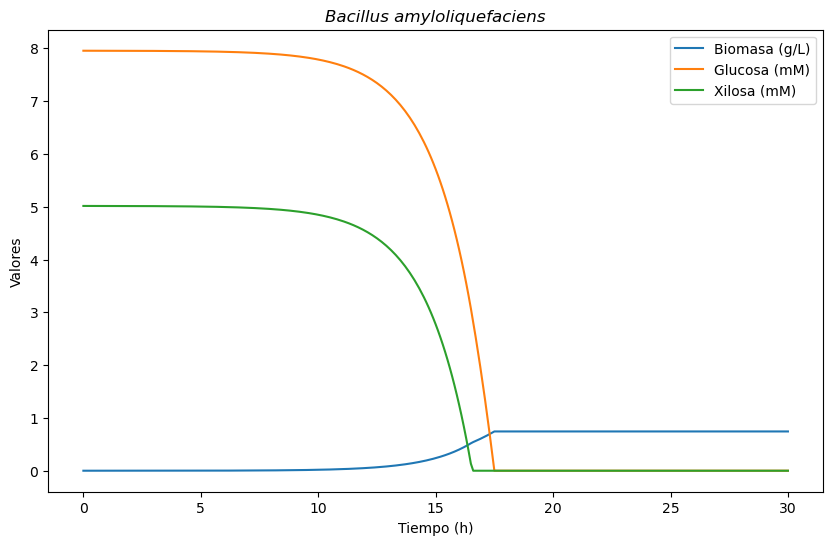

(        t  Biomasa (g/L)  Glucosa (mM)  Galactosa (mM)  Xilosa (mM)  \
 0     0.0       0.000100      7.953890               0     5.014409   
 1     0.1       0.000105      7.953840               0     5.014359   
 2     0.2       0.000111      7.953787               0     5.014306   
 3     0.3       0.000117      7.953732               0     5.014251   
 4     0.4       0.000123      7.953673               0     5.014192   
 ..    ...            ...           ...             ...          ...   
 296  29.6       0.743749      0.000000               0     0.000000   
 297  29.7       0.743749      0.000000               0     0.000000   
 298  29.8       0.743749      0.000000               0     0.000000   
 299  29.9       0.743749      0.000000               0     0.000000   
 300  30.0       0.743749      0.000000               0     0.000000   
 
      Ramnosa (mM)  Manitol (mM)  
 0         17.0317             0  
 1         17.0317             0  
 2         17.0317           

In [124]:
medio = media_cobra_dicc(model)
plot_growth(model=model, medio=medio, glc_D=18.4, xyl_D=11.6, gal=0, mnl=0, rmn=39.4)

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpg_2ko52d.lp
Reading time = 0.04 seconds
: 1348 rows, 3288 columns, 14260 nonzeros

Running COMETS simulation ...
Done!
El ciclo final es:  148


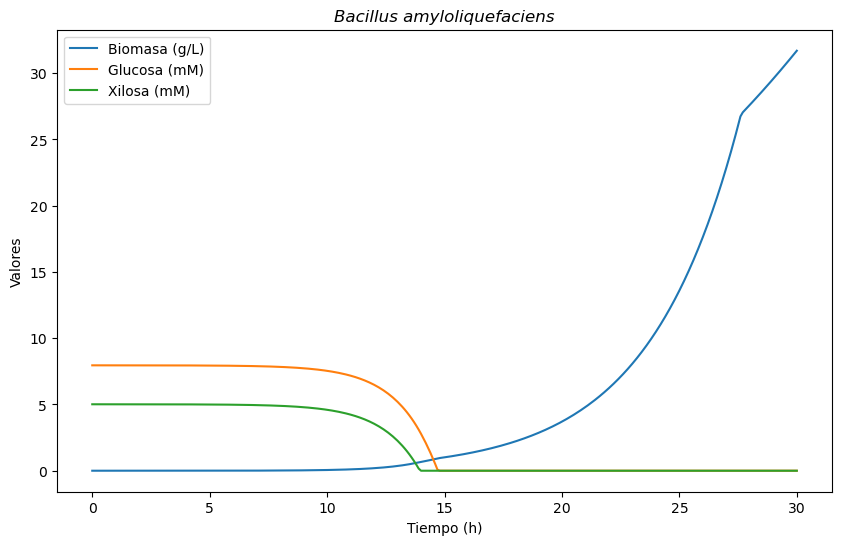

(        t  Biomasa (g/L)  Glucosa (mM)  Galactosa (mM)  Xilosa (mM)  \
 0     0.0       0.000100      7.953890               0     5.014409   
 1     0.1       0.000106      7.953840               0     5.014359   
 2     0.2       0.000113      7.953787               0     5.014306   
 3     0.3       0.000121      7.953730               0     5.014249   
 4     0.4       0.000129      7.953670               0     5.014189   
 ..    ...            ...           ...             ...          ...   
 296  29.6      30.833135      0.000000               0     0.000000   
 297  29.7      31.046582      0.000000               0     0.000000   
 298  29.8      31.261507      0.000000               0     0.000000   
 299  29.9      31.477920      0.000000               0     0.000000   
 300  30.0      31.695831      0.000000               0     0.000000   
 
      Ramnosa (mM)  Manitol (mM)  
 0         17.0317             0  
 1         17.0317             0  
 2         17.0317           

In [127]:
plot_growth(model=model, medio=medio_general, glc_D=18.4, xyl_D=11.6, gal=0, mnl=0, rmn=39.4)

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpot12cnek.lp
Reading time = 0.02 seconds
: 1348 rows, 3288 columns, 14260 nonzeros

Running COMETS simulation ...
Done!


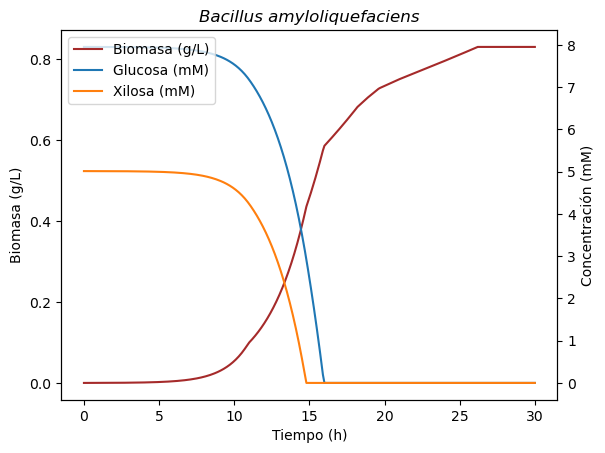

In [224]:
result = plot_growth(model=model, medio=medio_general, glc_D=18.4, xyl_D=11.6, gal=0, mnl=0, rmn=39.4)

## Iteramos con todos los modelos

Almacenamos la biomasa final de todas las simulaciones, así como el nombre del organismo correspondiente. Esto nos servirá después para hacer un histograma y seleccionar los mejores modelos para la optimización con FLYCOP en función de la distribución que observemos. Las concentraciones relativas de los azúcares que utilizaremos se corresponden con las que se observan en especies del género Ulva, con una concentración total de 20 mM:

In [13]:
#Obtenemos el medio general
lista_candidatos= candidate_models("candidate_models.txt")
modelos_candidatos = [descargar_leer_agora2(modelo) for modelo in lista_candidatos]
medio_general = general_minimal_media(modelos_candidatos)

c:\Users\rqr20\anaconda3\envs\comets_final\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
c:\Users\rqr20\anaconda3\envs\comets_final\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
c:\Users\rqr20\anaconda3\envs\comets_final\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
c:\Users\rqr20\anaconda3\envs\comets_final\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'o

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp1419jo6o.lp
Reading time = 0.02 seconds
: 1348 rows, 3288 columns, 14260 nonzeros

Running COMETS simulation ...
Done!


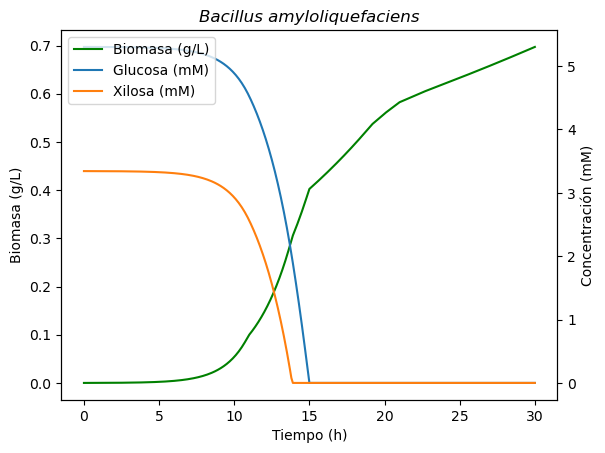

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp_fw3tsce.lp
Reading time = 0.03 seconds
: 1343 rows, 3284 columns, 14108 nonzeros

Running COMETS simulation ...
Done!


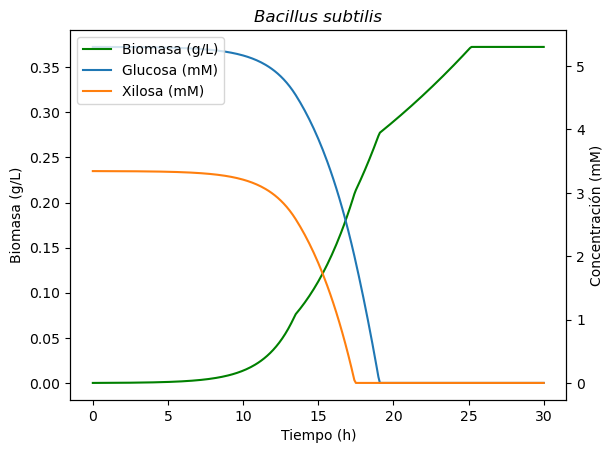

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpu7rhmf1w.lp
Reading time = 0.02 seconds
: 955 rows, 2066 columns, 8996 nonzeros

Running COMETS simulation ...
Done!


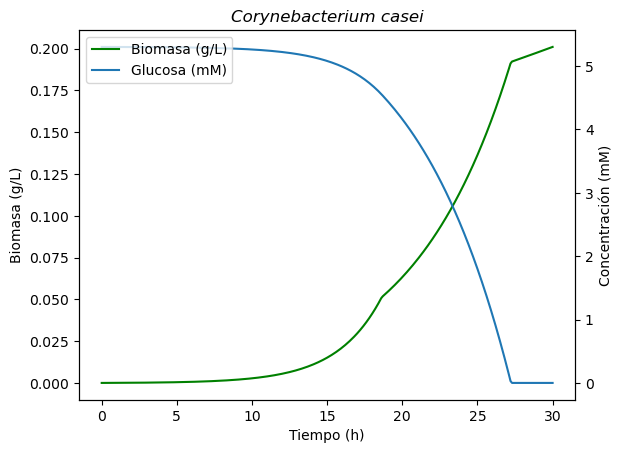

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpbaxhsnlo.lp
Reading time = 0.01 seconds
: 1303 rows, 2688 columns, 11668 nonzeros

Running COMETS simulation ...
Done!


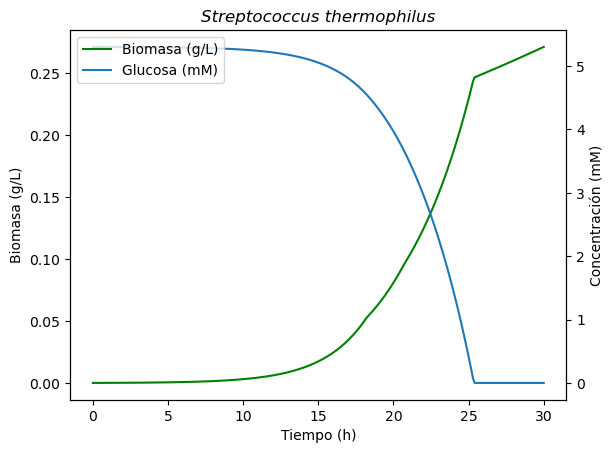

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp0q02wiil.lp
Reading time = 0.02 seconds
: 1105 rows, 2438 columns, 10766 nonzeros

Running COMETS simulation ...
Done!


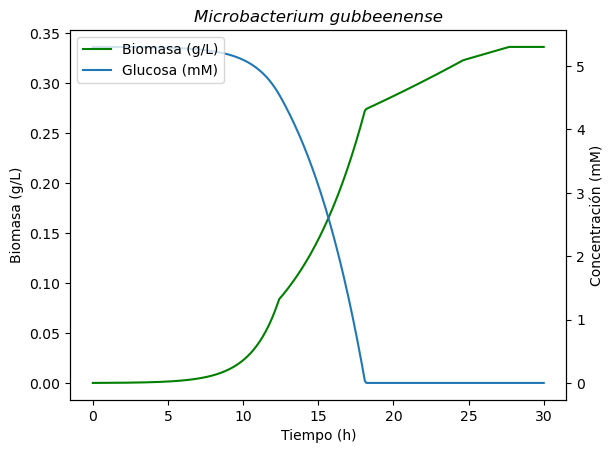

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpoh6dkzsl.lp
Reading time = 0.02 seconds
: 996 rows, 2198 columns, 9266 nonzeros

Running COMETS simulation ...
Done!


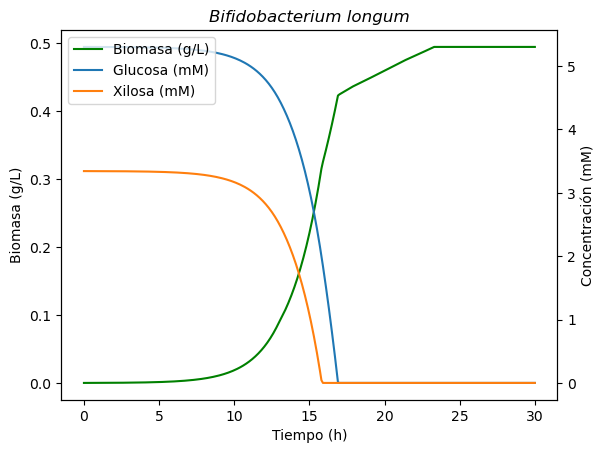

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp0wgw82x_.lp
Reading time = 0.02 seconds
: 1401 rows, 3482 columns, 14996 nonzeros

Running COMETS simulation ...
Done!


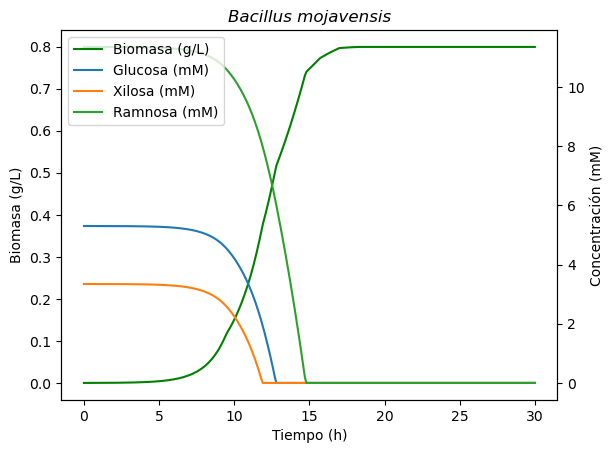

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpzqq6mouk.lp
Reading time = 0.02 seconds
: 1240 rows, 3028 columns, 13166 nonzeros

Running COMETS simulation ...
Done!


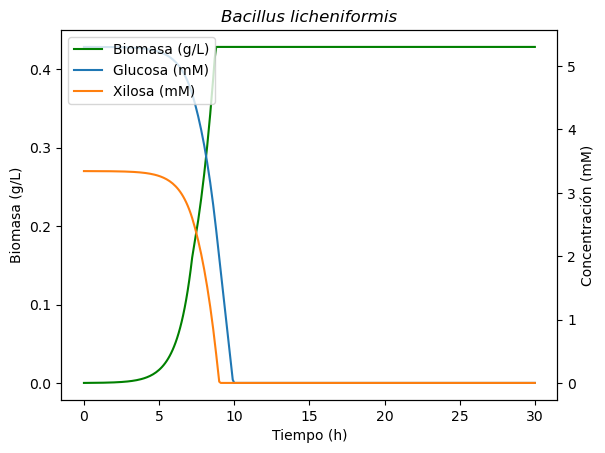

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpzl9oqorg.lp
Reading time = 0.02 seconds
: 1014 rows, 2236 columns, 9424 nonzeros

Running COMETS simulation ...
Done!


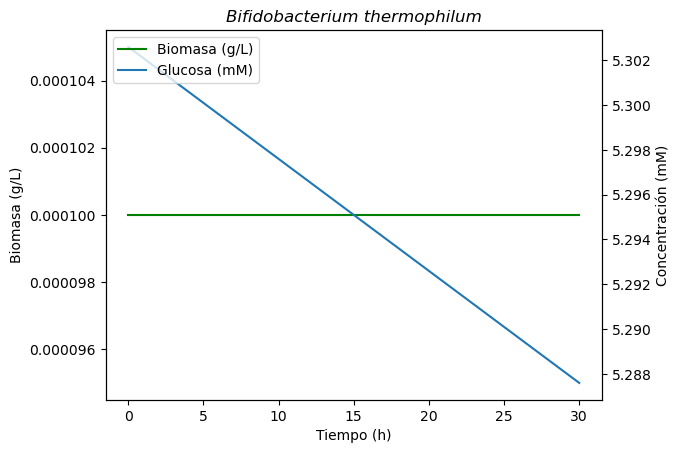

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp7zcb3ug5.lp
Reading time = 0.02 seconds
: 1140 rows, 2598 columns, 11416 nonzeros

Running COMETS simulation ...
Done!


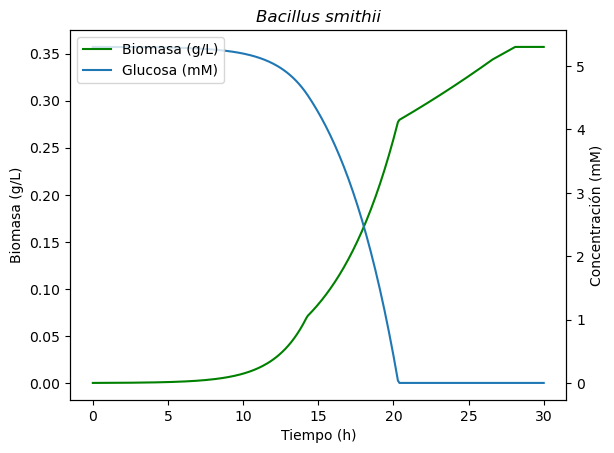

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpkjcy3uol.lp
Reading time = 0.03 seconds
: 1754 rows, 3834 columns, 16586 nonzeros

Running COMETS simulation ...
Done!


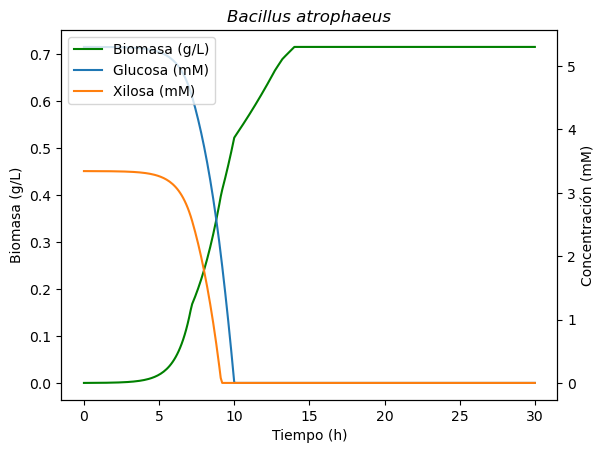

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmppy3si_gc.lp
Reading time = 0.02 seconds
: 1258 rows, 3024 columns, 13092 nonzeros

Running COMETS simulation ...
Done!


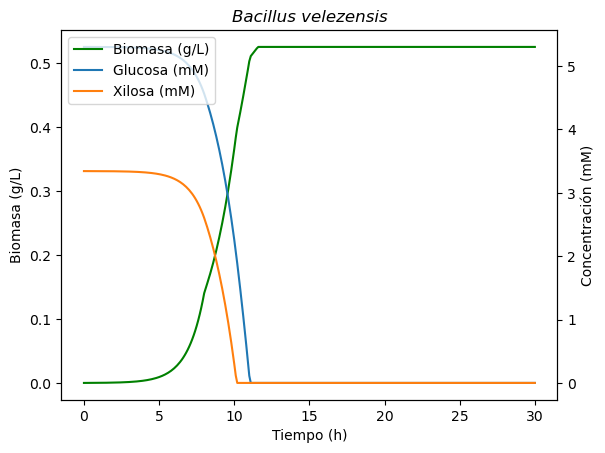

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp0ley2pev.lp
Reading time = 0.02 seconds
: 1316 rows, 2674 columns, 11294 nonzeros

Running COMETS simulation ...
Done!


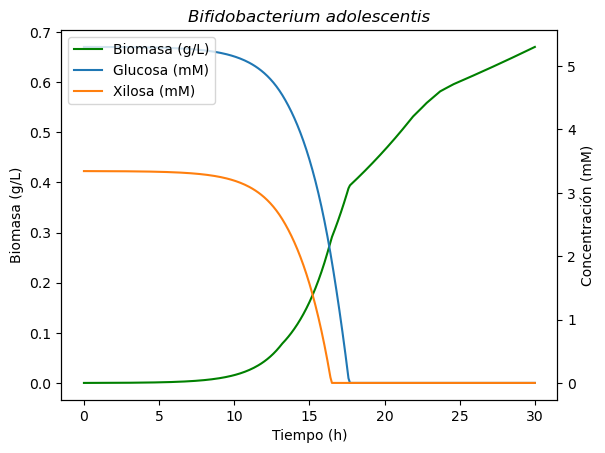

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp723ycq6x.lp
Reading time = 0.03 seconds
: 1153 rows, 2594 columns, 11250 nonzeros

Running COMETS simulation ...
Done!


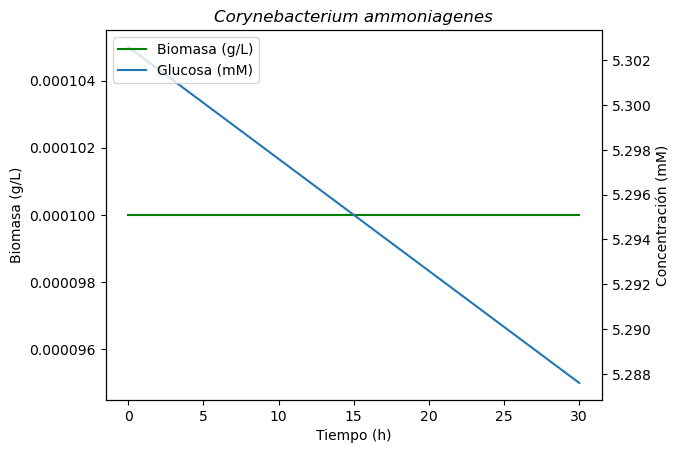

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpzlama9s_.lp
Reading time = 0.03 seconds
: 1203 rows, 2766 columns, 12138 nonzeros

Running COMETS simulation ...
Done!


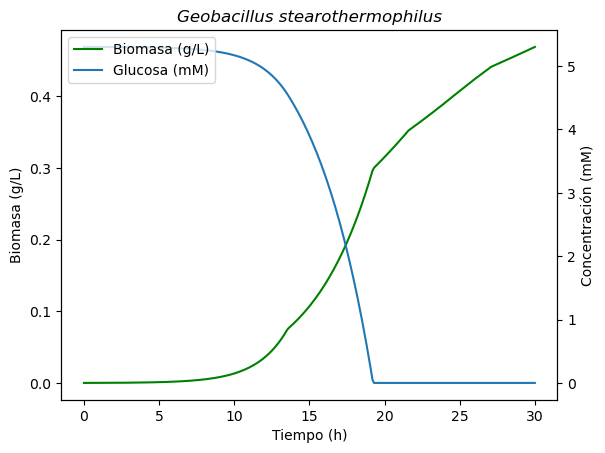

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpbr942_x1.lp
Reading time = 0.02 seconds
: 977 rows, 2190 columns, 9108 nonzeros

Running COMETS simulation ...
Done!


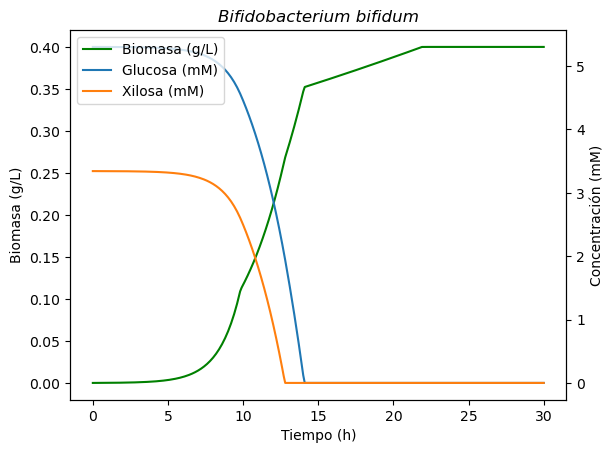

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpdk895khe.lp
Reading time = 0.02 seconds
: 1057 rows, 2444 columns, 10536 nonzeros

Running COMETS simulation ...
Done!


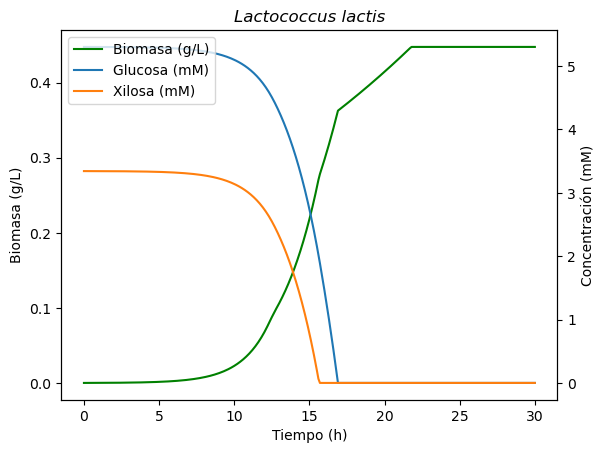

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpof3adhbh.lp
Reading time = 0.03 seconds
: 1318 rows, 3042 columns, 13152 nonzeros

Running COMETS simulation ...
Done!


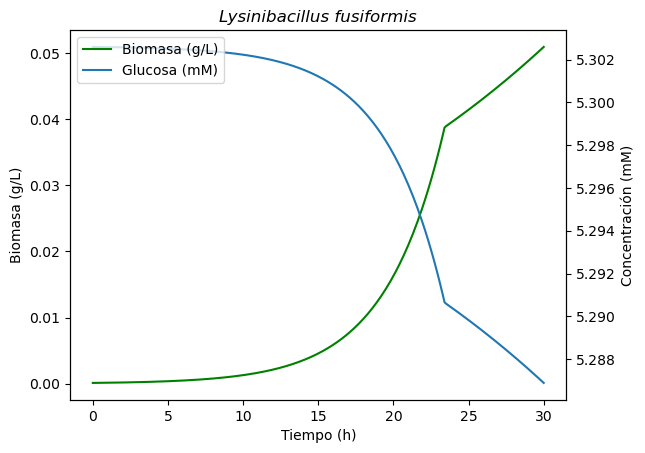

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpdtymofvy.lp
Reading time = 0.02 seconds
: 1024 rows, 2370 columns, 9644 nonzeros

Running COMETS simulation ...
Done!


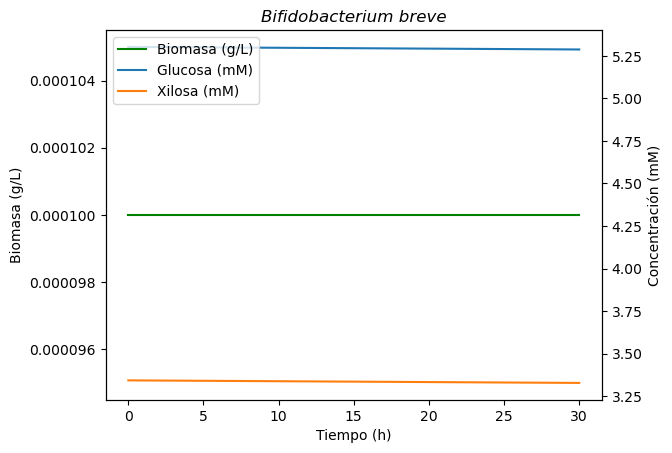

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp50s01lpb.lp
Reading time = 0.02 seconds
: 1491 rows, 3142 columns, 13396 nonzeros

Running COMETS simulation ...
Done!


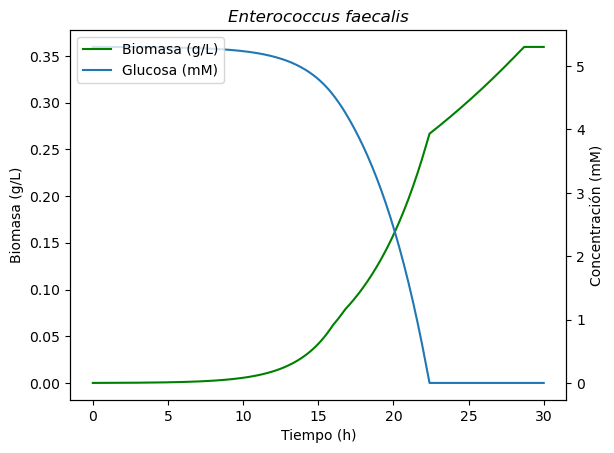

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpnek2whpr.lp
Reading time = 0.02 seconds
: 1352 rows, 3258 columns, 13960 nonzeros

Running COMETS simulation ...
Done!


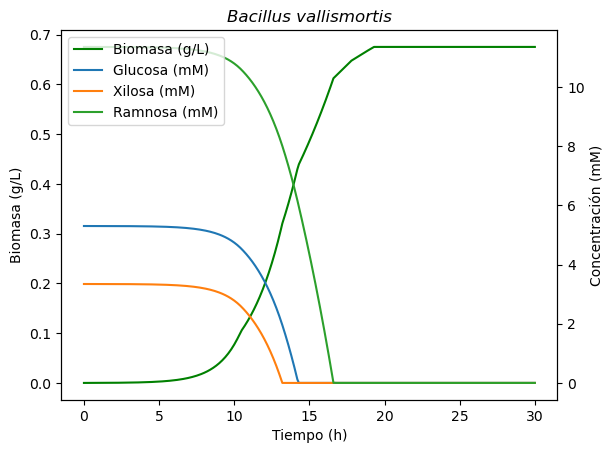

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpmoh0nqft.lp
Reading time = 0.07 seconds
: 1156 rows, 2264 columns, 9798 nonzeros

Running COMETS simulation ...
Done!


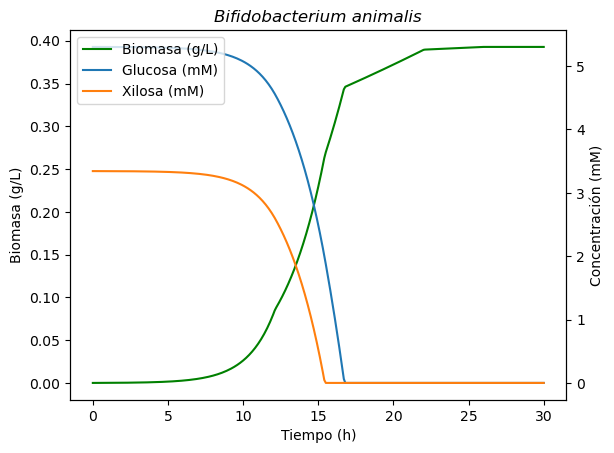

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpip_ag6hw.lp
Reading time = 0.02 seconds
: 1048 rows, 2332 columns, 9972 nonzeros

Running COMETS simulation ...
Done!


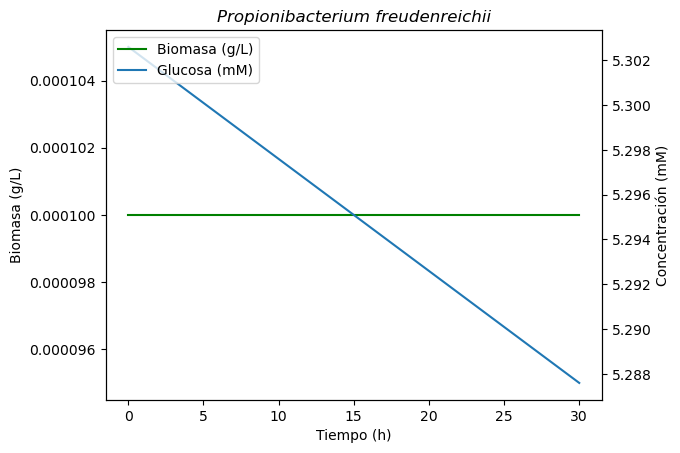

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmptlxy3zmn.lp
Reading time = 0.01 seconds
: 955 rows, 2064 columns, 8678 nonzeros

Running COMETS simulation ...
Done!


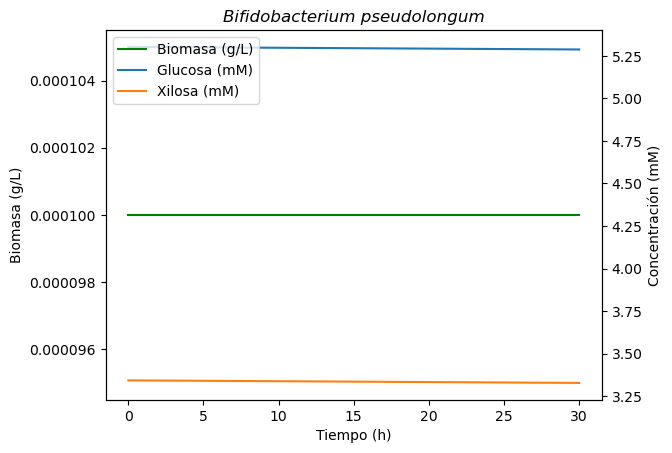

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpfjaai2bl.lp
Reading time = 0.01 seconds
: 1413 rows, 3356 columns, 13858 nonzeros

Running COMETS simulation ...
Done!


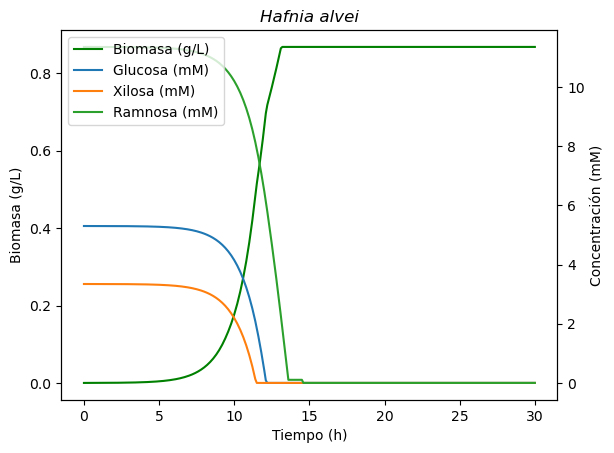

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp2xdohkql.lp
Reading time = 0.04 seconds
: 1194 rows, 2834 columns, 12522 nonzeros

Running COMETS simulation ...
Done!


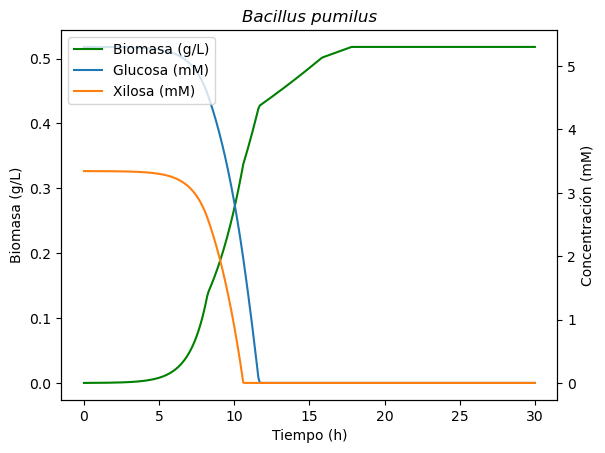

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpbo9p7uoa.lp
Reading time = 0.02 seconds
: 1182 rows, 2688 columns, 11654 nonzeros

Running COMETS simulation ...
Done!


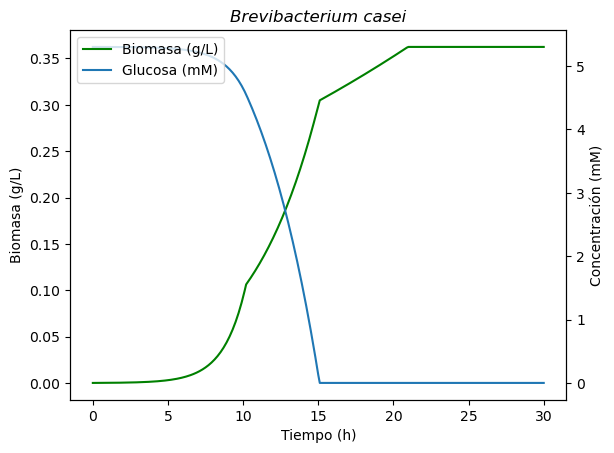

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp_cp4hh0q.lp
Reading time = 0.03 seconds
: 960 rows, 2172 columns, 9244 nonzeros

Running COMETS simulation ...
Done!


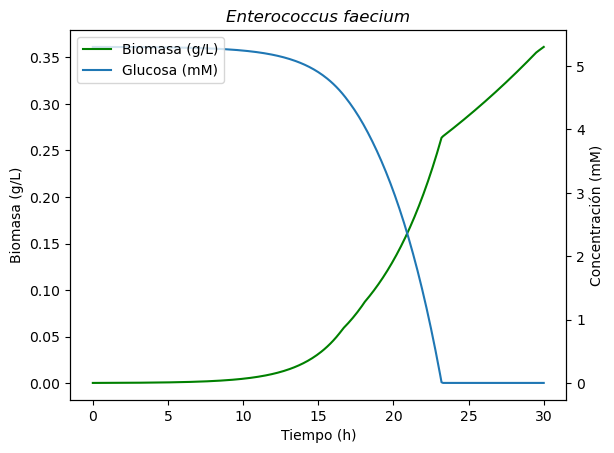

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpku8bzmty.lp
Reading time = 0.04 seconds
: 1378 rows, 2754 columns, 11912 nonzeros

Running COMETS simulation ...
Done!


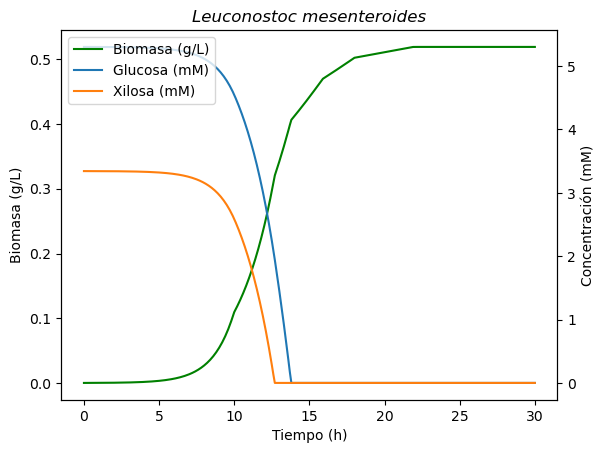

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpd7gnnsna.lp
Reading time = 0.02 seconds
: 973 rows, 2106 columns, 9052 nonzeros

Running COMETS simulation ...
Done!


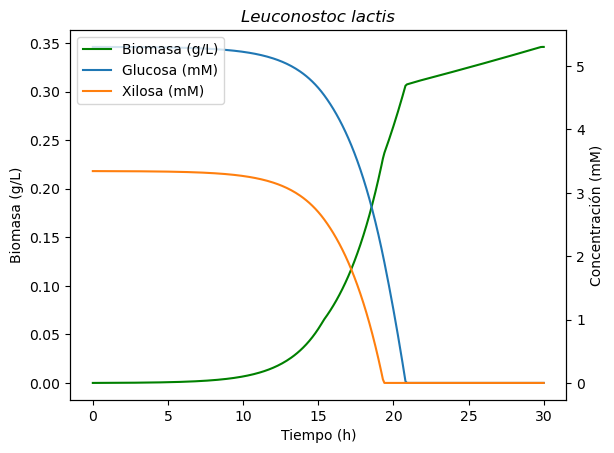

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmphxpgjvko.lp
Reading time = 0.02 seconds
: 1178 rows, 2308 columns, 10010 nonzeros

Running COMETS simulation ...
Done!


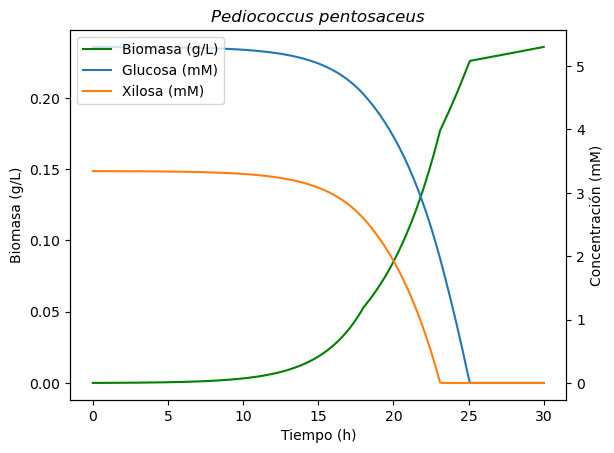

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpj7aoits4.lp
Reading time = 0.04 seconds
: 1226 rows, 2456 columns, 10486 nonzeros

Running COMETS simulation ...
Done!


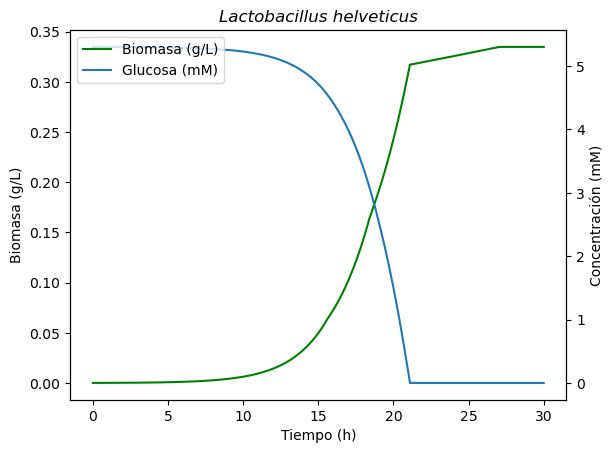

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp80_p2rui.lp
Reading time = 0.05 seconds
: 880 rows, 1888 columns, 8052 nonzeros

Running COMETS simulation ...
Done!


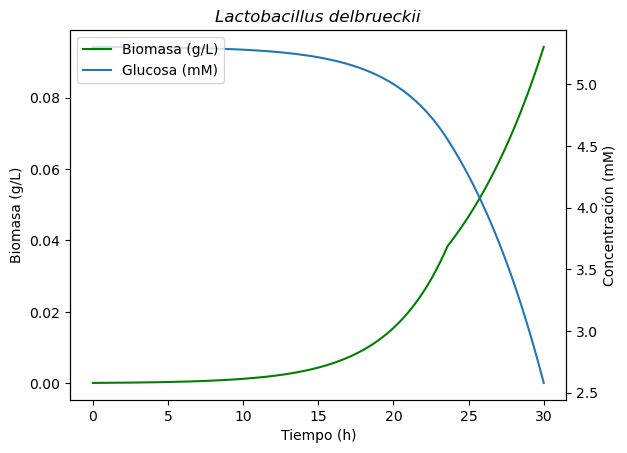

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmprwjtkdbh.lp
Reading time = 0.03 seconds
: 1230 rows, 2442 columns, 10486 nonzeros

Running COMETS simulation ...
Done!


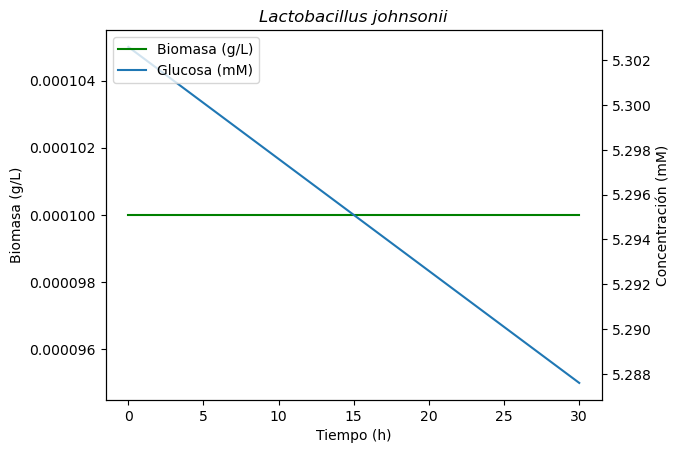

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpv4tkhncy.lp
Reading time = 0.03 seconds
: 1235 rows, 2476 columns, 10492 nonzeros

Running COMETS simulation ...
Done!


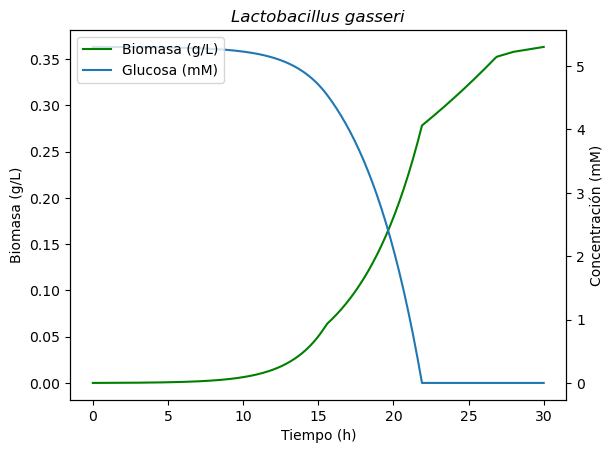

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpcqkh96o1.lp
Reading time = 0.03 seconds
: 905 rows, 1996 columns, 8610 nonzeros

Running COMETS simulation ...
Done!


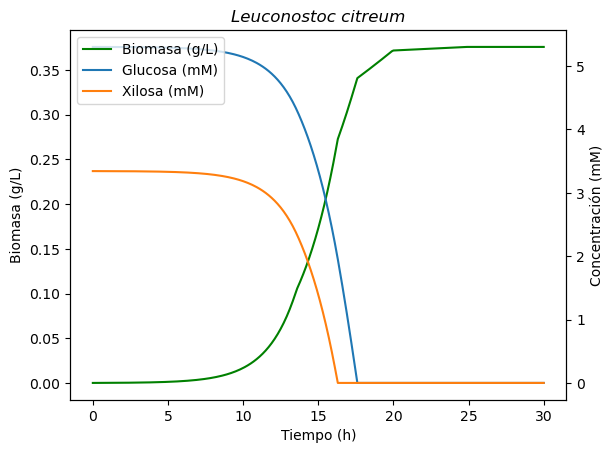

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmps5q8fi59.lp
Reading time = 0.02 seconds
: 833 rows, 1768 columns, 7536 nonzeros

Running COMETS simulation ...
Done!


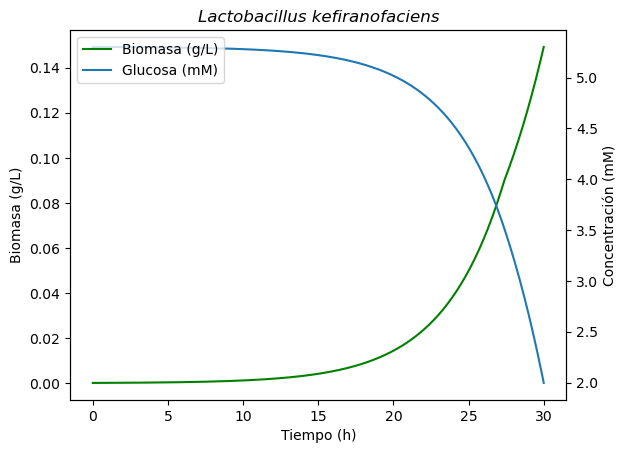

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpw497t547.lp
Reading time = 0.03 seconds
: 991 rows, 2166 columns, 9022 nonzeros

Running COMETS simulation ...
Done!


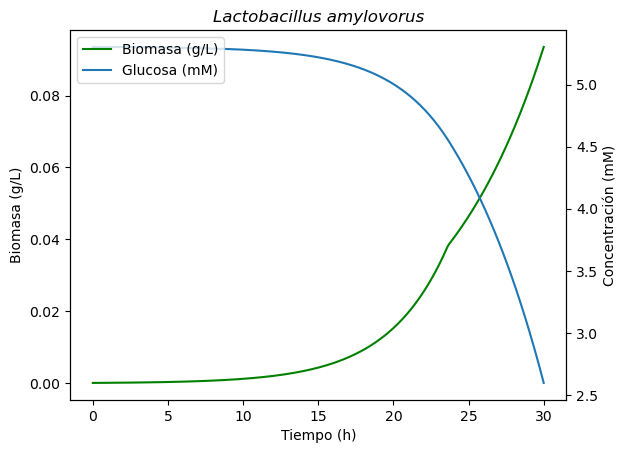

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp_ahxdg6n.lp
Reading time = 0.03 seconds
: 928 rows, 2016 columns, 8680 nonzeros

Running COMETS simulation ...
Done!


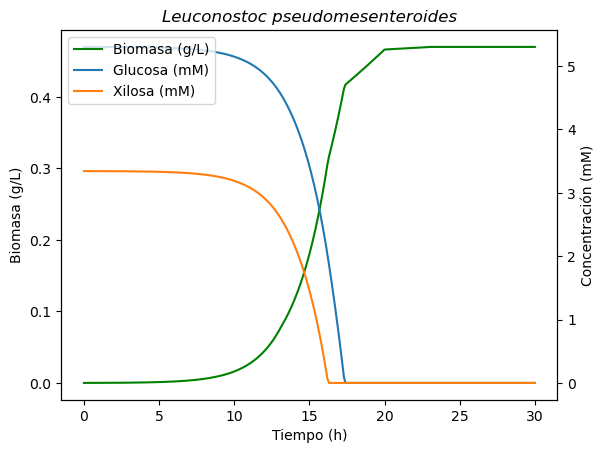

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpnpm8o406.lp
Reading time = 0.01 seconds
: 847 rows, 1836 columns, 7606 nonzeros

Running COMETS simulation ...
Done!


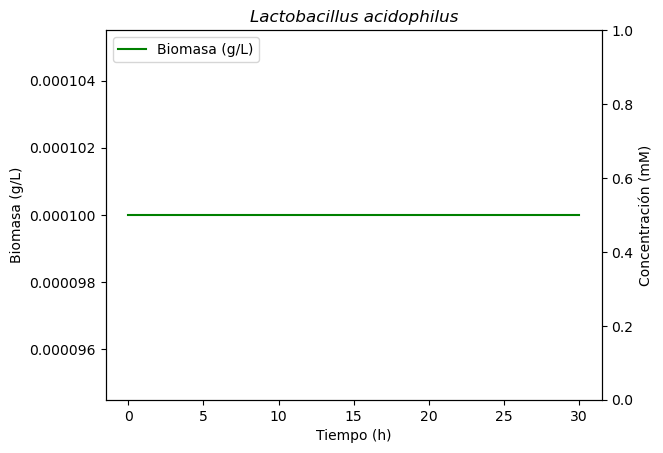

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmpvf5caiaz.lp
Reading time = 0.04 seconds
: 1246 rows, 2460 columns, 10616 nonzeros

Running COMETS simulation ...
Done!


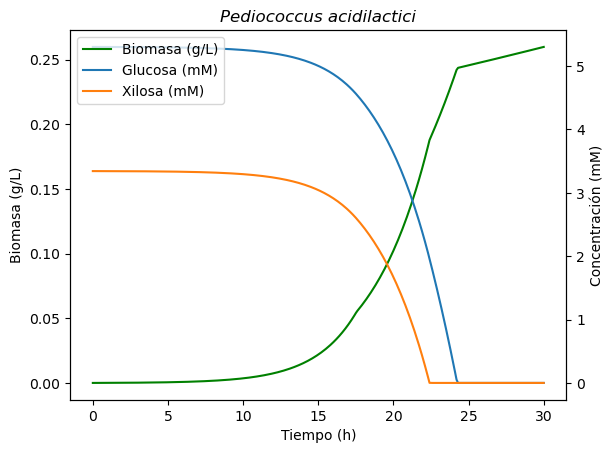

building empty layout model
models will need to be added with layout.add_model()
Read LP format model from file C:\Users\rqr20\AppData\Local\Temp\tmp6n_5qz4h.lp
Reading time = 0.04 seconds
: 1164 rows, 2242 columns, 9610 nonzeros

Running COMETS simulation ...
Done!


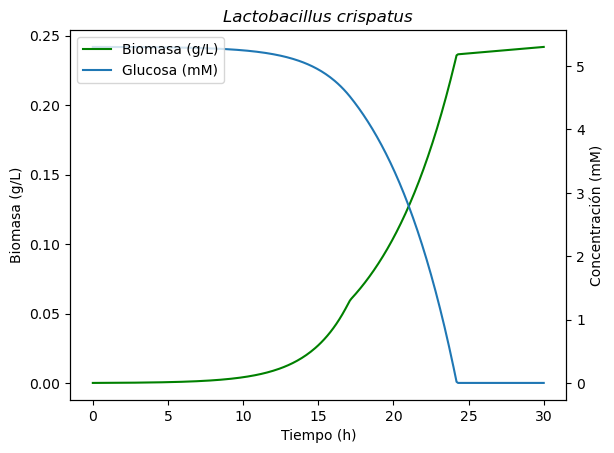

In [14]:
import warnings
warnings.filterwarnings("ignore")
#Creamos la lista de biomasas, y un diccionario organismo: biomasa
result_biomasses = []
organism_biomass = {}
for model in modelos_candidatos:
    df, name, biomass, sugars, assay = plot_growth(model, medio_general, glc_D=18.4, xyl_D=11.6, gal=0, mnl=0, rmn=39.4)
    result_biomasses.append(biomass)
    organism_biomass[name] = (biomass, sugars)

In [15]:
#Exportamos el diccionario con los resultados
import json

# Escribir el diccionario a un archivo JSON
with open('Organismos_biomasas.json', 'w') as f:
    json.dump(organism_biomass, f)

# Análisis de los resultados

In [16]:
#Importamos los resultados
import json

# Leer el archivo JSON
with open('Organismos_biomasas.json', 'r') as f:
    organism_biomass = json.load(f)

#Creamos la lista de biomasas
result_biomasses = [data[0] for data in organism_biomass.values()]
organism_biomass

{'Bacillus amyloliquefaciens': [0.69705112074, ['Glucosa', 'Xilosa']],
 'Bacillus subtilis': [0.37239852565, ['Glucosa', 'Xilosa']],
 'Corynebacterium casei': [0.20097990584, ['Glucosa']],
 'Streptococcus thermophilus': [0.27096913145, ['Glucosa']],
 'Microbacterium gubbeenense': [0.33655566682, ['Glucosa']],
 'Bifidobacterium longum': [0.49438402867, ['Glucosa', 'Xilosa']],
 'Bacillus mojavensis': [0.79935363755, ['Glucosa', 'Xilosa', 'Ramnosa']],
 'Bacillus licheniformis': [0.42864583036, ['Glucosa', 'Xilosa']],
 'Bifidobacterium thermophilum': [0.0001, ['Glucosa']],
 'Bacillus smithii': [0.35716883713, ['Glucosa']],
 'Bacillus atrophaeus': [0.71606244701, ['Glucosa', 'Xilosa']],
 'Bacillus velezensis': [0.52523363391, ['Glucosa', 'Xilosa']],
 'Bifidobacterium adolescentis': [0.67050092484, ['Glucosa', 'Xilosa']],
 'Corynebacterium ammoniagenes': [0.0001, ['Glucosa']],
 'Geobacillus stearothermophilus': [0.46895538007, ['Glucosa']],
 'Bifidobacterium bifidum': [0.40003830907, ['Gluco

In [19]:
#Convertimos los resultados a un csv
output = "\t".join([str(biom).replace(".",",") for biom in result_biomasses])
with open("resultado_biomasas_2.csv", 'a') as file:
    file.write(output)

In [20]:
import pandas as pd
df = pd.DataFrame()
#Ordenamos las especies en función de la biomasa producida
organism_biomass_ordenado = dict(sorted(organism_biomass.items(), key=lambda item: item[1][0], reverse=True))

#Eliminamos los que tengan crecimiento menor que 0.6
dicc_mejores = {}
for org, data in organism_biomass_ordenado.items():
    #if data[0]>0.6:
    #    dicc_mejores[org] = data
    dicc_mejores[org] = data

df["Organismo"] = list(dicc_mejores.keys())
df["Biomasa"] = [value[0] for value in dicc_mejores.values()]
df["Glucosa"] = ["Glucosa" in value[1] for value in dicc_mejores.values()]
df["Xilosa"] = ["Xilosa" in value[1] for value in dicc_mejores.values()]
df["Ramnosa"] = ["Ramnosa" in value[1] for value in dicc_mejores.values()]
# Exportar el DataFrame a un archivo Excel
df.to_excel('Tabla_producciones_2.xlsx', index=False)

In [21]:
organism_biomass_ordenado

{'Hafnia alvei': [0.86832321931, ['Glucosa', 'Xilosa', 'Ramnosa']],
 'Bacillus mojavensis': [0.79935363755, ['Glucosa', 'Xilosa', 'Ramnosa']],
 'Bacillus atrophaeus': [0.71606244701, ['Glucosa', 'Xilosa']],
 'Bacillus amyloliquefaciens': [0.69705112074, ['Glucosa', 'Xilosa']],
 'Bacillus vallismortis': [0.67546560942, ['Glucosa', 'Xilosa', 'Ramnosa']],
 'Bifidobacterium adolescentis': [0.67050092484, ['Glucosa', 'Xilosa']],
 'Bacillus velezensis': [0.52523363391, ['Glucosa', 'Xilosa']],
 'Leuconostoc mesenteroides': [0.519147614, ['Glucosa', 'Xilosa']],
 'Bacillus pumilus': [0.51801675894, ['Glucosa', 'Xilosa']],
 'Bifidobacterium longum': [0.49438402867, ['Glucosa', 'Xilosa']],
 'Leuconostoc pseudomesenteroides': [0.47003059216, ['Glucosa', 'Xilosa']],
 'Geobacillus stearothermophilus': [0.46895538007, ['Glucosa']],
 'Lactococcus lactis': [0.44749509999, ['Glucosa', 'Xilosa']],
 'Bacillus licheniformis': [0.42864583036, ['Glucosa', 'Xilosa']],
 'Bifidobacterium bifidum': [0.4000383090

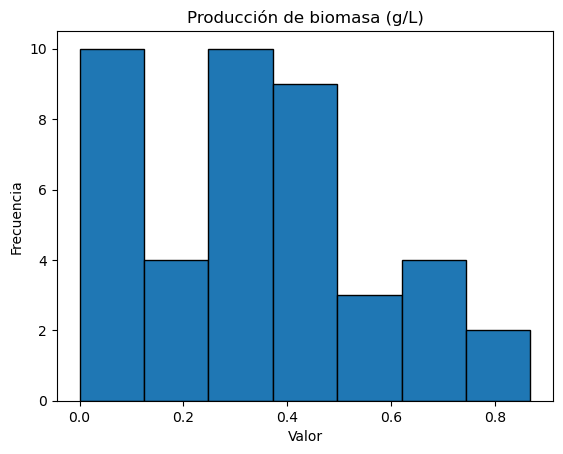

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.hist(result_biomasses, bins='auto', edgecolor='black')

# Añadir título y etiquetas
plt.title('Producción de biomasa (g/L)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()
plt.savefig("Histograma_biomasas.jpg", format="jpg", dpi=500)

In [18]:
#Organismos con baja producción de biomasa:
seleccion = []
for org, data in organism_biomass.items():
    if data[0] < 0.4:
        print(org, " ", data)
        seleccion.append(org)

Bacillus subtilis   [0.37239852565, ['Glucosa', 'Xilosa']]
Corynebacterium casei   [0.20097990584, ['Glucosa']]
Streptococcus thermophilus   [0.27096913145, ['Glucosa']]
Microbacterium gubbeenense   [0.33655566682, ['Glucosa']]
Bifidobacterium thermophilum   [0.0001, ['Glucosa']]
Bacillus smithii   [0.35716883713, ['Glucosa']]
Corynebacterium ammoniagenes   [0.0001, ['Glucosa']]
Lysinibacillus fusiformis   [0.050962984936, ['Glucosa']]
Bifidobacterium breve   [0.0001, ['Glucosa', 'Xilosa']]
Enterococcus faecalis   [0.35950814488, ['Glucosa']]
Bifidobacterium animalis   [0.39282229893, ['Glucosa', 'Xilosa']]
Propionibacterium freudenreichii   [0.0001, ['Glucosa']]
Bifidobacterium pseudolongum   [0.0001, ['Glucosa', 'Xilosa']]
Brevibacterium casei   [0.36242861857, ['Glucosa']]
Enterococcus faecium   [0.36135419587, ['Glucosa']]
Leuconostoc lactis   [0.34594761373, ['Glucosa', 'Xilosa']]
Pediococcus pentosaceus   [0.23572070562, ['Glucosa', 'Xilosa']]
Lactobacillus helveticus   [0.334858

In [25]:
#Buscamos los organismos con alta producción de biomasa:
seleccion = []
for org, data in organism_biomass.items():
    if data[0] > 0.45:
        print(org, " ", data)
        seleccion.append(org)

Bacillus amyloliquefaciens   [0.69705112074, ['Glucosa', 'Xilosa']]
Bifidobacterium longum   [0.49438402867, ['Glucosa', 'Xilosa']]
Bacillus mojavensis   [0.79935363755, ['Glucosa', 'Xilosa', 'Ramnosa']]
Bacillus atrophaeus   [0.71606244701, ['Glucosa', 'Xilosa']]
Bacillus velezensis   [0.52523363391, ['Glucosa', 'Xilosa']]
Bifidobacterium adolescentis   [0.67050092484, ['Glucosa', 'Xilosa']]
Geobacillus stearothermophilus   [0.46895538007, ['Glucosa']]
Bacillus vallismortis   [0.67546560942, ['Glucosa', 'Xilosa', 'Ramnosa']]
Hafnia alvei   [0.86832321931, ['Glucosa', 'Xilosa', 'Ramnosa']]
Bacillus pumilus   [0.51801675894, ['Glucosa', 'Xilosa']]
Leuconostoc mesenteroides   [0.519147614, ['Glucosa', 'Xilosa']]
Leuconostoc pseudomesenteroides   [0.47003059216, ['Glucosa', 'Xilosa']]


In [23]:
#Buscamos los organismos con alta producción de biomasa:
seleccion = []
for org, data in organism_biomass.items():
    if data[0] > 0.45:
        print(org)

Bacillus amyloliquefaciens
Bifidobacterium longum
Bacillus mojavensis
Bacillus atrophaeus
Bacillus velezensis
Bifidobacterium adolescentis
Geobacillus stearothermophilus
Bacillus vallismortis
Hafnia alvei
Bacillus pumilus
Leuconostoc mesenteroides
Leuconostoc pseudomesenteroides


In [26]:
print("El número total de organismos explorado es: ", len(result_biomasses))
print("El número de organismos con crecimiento superior a 0.45 son: ", len(seleccion))

El número total de organismos explorado es:  42
El número de organismos con crecimiento superior a 0.45 son:  12


Hacemos un plot que relacione el número de azúcares consumidos con la biomasa producida:

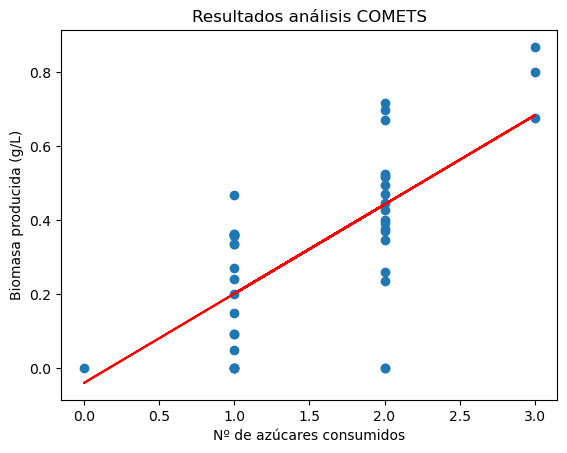

In [28]:
import numpy as np
from matplotlib import pyplot as pyplot

n_sugars = []
biomass = []
for data in organism_biomass.values():
    biomass.append(data[0])
    n_sugars.append(len(data[1]))

# Calcular la regresión lineal
coefficients = np.polyfit(n_sugars, biomass, 1)
polynomial = np.poly1d(coefficients)

# Crear el gráfico de dispersión
plt.scatter(n_sugars, biomass)

# Plotear la línea de regresión
plt.plot(n_sugars, polynomial(n_sugars), color='red', label='Regresión lineal')

# Añadir etiquetas y título
plt.xlabel('Nº de azúcares consumidos')
plt.ylabel('Biomasa producida (g/L)')
plt.title('Resultados análisis COMETS')

#Guardar el gráfico
plt.savefig("Correlación azúcares-biomasa.jpg", format="jpg",dpi=600)

# Mostrar el gráfico
plt.show()

### PRUEBAS

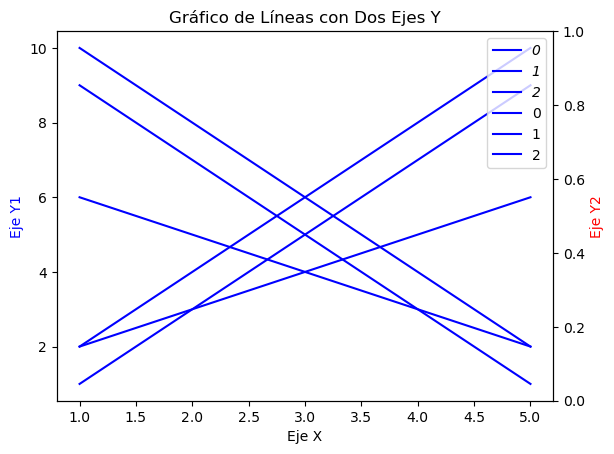

In [13]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Datos
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]
y3 = [2, 3, 4, 5, 6]
y_1 = [y1,y2,y3]

y4 = [10, 8, 6, 4, 2]
y5 = [9, 7, 5, 3, 1]
y6 = [6, 5, 4, 3, 2]
y_2 = [y4,y5,y6]

fig, ax1 = plt.subplots()

# Crear el primer conjunto de líneas
lines_1 = []
for i, serie in enumerate(y_1):
    lines_1.append(ax1.plot(x, serie, 'b-', label=i))
ax1.set_xlabel('Eje X')
ax1.set_ylabel('Eje Y1', color='b')
lines_1 = [elemento for sublist in lines_1 for elemento in sublist] #Hacemos unlist

# Crear un segundo eje Y que comparte el mismo eje X
ax2 = ax1.twinx()
lines_2 = []
for i, serie in enumerate(y_2):
    lines_2.append(ax1.plot(x, serie, 'b-', label=i))
ax2.set_ylabel('Eje Y2', color='r')
lines_2 = [elemento for sublist in lines_2 for elemento in sublist] #Hacemos unlist

# Título y etiquetas del eje X
plt.title('Gráfico de Líneas con Dos Ejes Y')

#Leyendas
font_italic = FontProperties()
font_italic.set_style('italic')

font_normal = FontProperties()
font_normal.set_style('normal')

# Crear una sola leyenda combinada
lines = lines_1 + lines_2
labels = [line.get_label() for line in lines]

# Crear leyenda general
legend = plt.legend(lines, labels, loc='upper right', prop=font_normal, ncol=1)

# Obtener las etiquetas de la leyenda y asignarles el estilo de fuente adecuado
for text, font in zip(legend.get_texts(), [font_italic] * 3 + [font_normal] * 3):
    text.set_fontproperties(font)

# Mostrar el gráfico
plt.show()